In [1]:
import polars as pl
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw
import json
import numpy as np
from google.colab.patches import cv2_imshow

In [10]:
os.listdir('images')

['pic1.jpg', 'pic2.jpg', 'pic3.jpg', 'pic4.jpg', 'pic5.jpg']

In [2]:
image=Image.open("images/pic1.jpg")

In [5]:
image.show()

In [177]:
with open('annotations.json') as json_file:
    bb=json.load(json_file)
bb.keys()

dict_keys(['tags', 'images'])

In [4]:
regions=[]
for img in bb['images']:
    for region in img['annotated_regions']:
        regions.append(region['region'] )
    break
regions


[{'xmin': 0.6413427734375,
  'ymin': 0.6965780079588015,
  'xmax': 0.688720703125,
  'ymax': 0.8477147705992509},
 {'xmin': 0.161240234375,
  'ymin': 0.6462356624531835,
  'xmax': 0.238310546875,
  'ymax': 0.721361481741573},
 {'xmin': 0.3599468994140625,
  'ymin': 0.6887298469686329,
  'xmax': 0.4178986358642578,
  'ymax': 0.815910196482912},
 {'xmin': 0.3394189453125,
  'ymin': 0.6878072331460674,
  'xmax': 0.3684814453125,
  'ymax': 0.8056384597378277},
 {'xmin': 0.210302734375,
  'ymin': 0.3345037453183521,
  'xmax': 0.7,
  'ymax': 0.8810495669475655},
 {'xmin': 0.4545947265625,
  'ymin': 0.6849762991573034,
  'xmax': 0.5063427734375,
  'ymax': 0.8378686797752809},
 {'xmin': 0.702763671875,
  'ymin': 0.6530386821161048,
  'xmax': 0.915439453125,
  'ymax': 0.8549274344569289},
 {'xmin': 0.0711767578125,
  'ymin': 0.6359652972846442,
  'xmax': 0.153955078125,
  'ymax': 0.7299128043071161},
 {'xmin': 0.2260498046875,
  'ymin': 0.6758178253745318,
  'xmax': 0.24232421875,
  'ymax': 0.7

In [5]:
bb=[]
for sub_regions in regions:
    bb.append(list(sub_regions.values()))

In [6]:
bb

[[0.6413427734375, 0.6965780079588015, 0.688720703125, 0.8477147705992509],
 [0.161240234375, 0.6462356624531835, 0.238310546875, 0.721361481741573],
 [0.3599468994140625,
  0.6887298469686329,
  0.4178986358642578,
  0.815910196482912],
 [0.3394189453125, 0.6878072331460674, 0.3684814453125, 0.8056384597378277],
 [0.210302734375, 0.3345037453183521, 0.7, 0.8810495669475655],
 [0.4545947265625, 0.6849762991573034, 0.5063427734375, 0.8378686797752809],
 [0.702763671875, 0.6530386821161048, 0.915439453125, 0.8549274344569289],
 [0.0711767578125, 0.6359652972846442, 0.153955078125, 0.7299128043071161],
 [0.2260498046875, 0.6758178253745318, 0.24232421875, 0.7654494382022472],
 [0.2345361328125, 0.6822112008426966, 0.284169921875, 0.7772486540262172]]

In [7]:
draw=ImageDraw.Draw(image)

In [8]:
for (x1,y1,x2,y2) in bb:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
image.show()

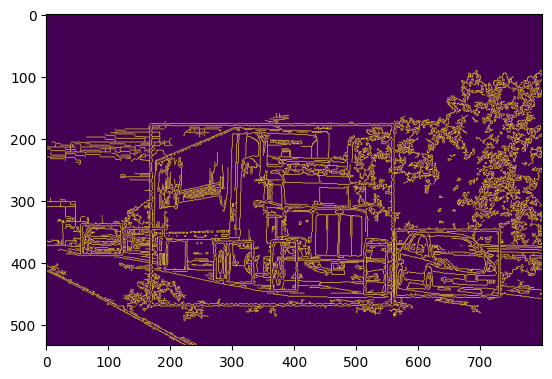

In [46]:
img=cv2.Canny(np.array(image), int(np.median(np.array(image))*0), int(np.median(np.array(image))*3))
plt.imshow( Image.fromarray(img))

In [65]:
def medianCanny(img):
    img=cv2.Canny(np.array(image), int(np.median(np.array(image))*0), int(np.median(np.array(image))*3))
    return img
contours, hierarchy =cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boxes=[]
hierarchy=hierarchy[0]
color_edges=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for components in zip(contours,hierarchy):
    currentContour=components[0]
    currenthierarchy=components[1]
    x,y,w,h=cv2.boundingRect(currentContour)
    if currenthierarchy[3]<0:
        cv2.rectangle(color_edges,(x,y),(x+w,y+h), (0,255,0), 1)
        boxes.append([[x,y], [x+w, y+h]])
filtered=[]
for box in boxes:
    w=box[1][0]-box[0][0]
    h=box[1][1]-box[0][1]
    if w*h < 30:
        filtered.append(box)
boxes=filtered

merge_margin = 15



In [66]:
def tup(point):
    return(point[0], point[1])
def overlap(source,target):
    tl1,br1=source
    tl2,br2=target

    if tl1[0]>=br2[0] or tl2[0]>= br1[0]:
        return False
    if (tl1[1]>=br2[1] or tl2[1]>=br1[1]):
        return False
    return True
def GetAllOverlaps(boxes, bounds, index):
    overlaps=[]
    for a in range(len(boxes)):
        if a!= index:
            if overlap(bounds,boxes[a]):
                overlaps.append(a)
    return overlaps


# Code de Stack Overflow

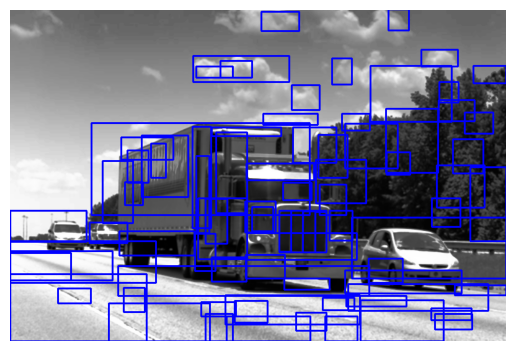

In [ ]:
img = cv2.imread('images/pic2.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img, (5, 5), 0)
img = cv2.equalizeHist(img)
edges = cv2.Canny(img, 5, 150)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w * h > 1000:  
        filtered_contours.append(contour)
contour_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(contour_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# On essaye une autre technique

In [103]:
bb

[[0.6413427734375, 0.6965780079588015, 0.688720703125, 0.8477147705992509],
 [0.161240234375, 0.6462356624531835, 0.238310546875, 0.721361481741573],
 [0.3599468994140625,
  0.6887298469686329,
  0.4178986358642578,
  0.815910196482912],
 [0.3394189453125, 0.6878072331460674, 0.3684814453125, 0.8056384597378277],
 [0.210302734375, 0.3345037453183521, 0.7, 0.8810495669475655],
 [0.4545947265625, 0.6849762991573034, 0.5063427734375, 0.8378686797752809],
 [0.702763671875, 0.6530386821161048, 0.915439453125, 0.8549274344569289],
 [0.0711767578125, 0.6359652972846442, 0.153955078125, 0.7299128043071161],
 [0.2260498046875, 0.6758178253745318, 0.24232421875, 0.7654494382022472],
 [0.2345361328125, 0.6822112008426966, 0.284169921875, 0.7772486540262172]]

In [ ]:
bb_all_images = {}
for img in bb['images']:
    image_path = img['location']
    boun_box = []
    for region in img['annotated_regions']:
        region_data = region['region']
        x1, y1, x2, y2 = region_data['xmin'], region_data['ymin'], region_data['xmax'], region_data['ymax']
        boun_box.append((x1, y1, x2, y2))
    bb_all_images[image_path] = boun_box

In [243]:
bb=bb_all_images['images/pic1.jpg']
new_bounding_box={}
merged_indice=set()
for i in range(len(bb)):
    (X1,Y1,X2,Y2)=bb[i]
    for j in range(len(bb)):
        (x1,y1,x2,y2)=bb[j]
        if ((X1-x1<0) or (X2-x2<0) or (Y1-y1<0) or (Y2-y2<0)) and ((abs(X1 - x2) < 0.05) or (abs(X2 - x1) < 0.05) or 
            (abs(Y1 - y2) < 0.05) or (abs(Y2 - y1) < 0.05)) and i!=j:
            new_x1=min(X1,x1)
            new_x2=max(X2,x2)
            new_y1=min(y1,Y1)
            new_y2=max(Y2,y2)
            if (new_x1-new_x2)*(new_y1-new_y2)<0.019:
                key = (new_x1, new_y1, new_x2, new_y2)  # Une clé unique pour éviter les doublons
                new_bounding_box[key] = [new_x1, new_y1, new_x2, new_y2]
                merged_indice.add(i)
                merged_indice.add(j)

        # else:
        #     key=(x1,y1,x2,y2)
        #     new_bounding_box[key]=[x1,y1,x2,y2]
for k in range(len(bb)):
    if k not in merged_indice:
        (x1,y1,x2,y2)=bb[k]
        key=(x1,y1,x2,y2)
        new_bounding_box[key]=[x1,y1,x2,y2]
list(new_bounding_box)
    

        

[(0.0711767578125, 0.6359652972846442, 0.238310546875, 0.7299128043071161),
 (0.161240234375, 0.6462356624531835, 0.24232421875, 0.7654494382022472),
 (0.161240234375, 0.6462356624531835, 0.284169921875, 0.7772486540262172),
 (0.3394189453125, 0.6878072331460674, 0.4178986358642578, 0.815910196482912),
 (0.2260498046875, 0.6758178253745318, 0.284169921875, 0.7772486540262172),
 (0.6413427734375, 0.6965780079588015, 0.688720703125, 0.8477147705992509),
 (0.210302734375, 0.3345037453183521, 0.7, 0.8810495669475655),
 (0.4545947265625, 0.6849762991573034, 0.5063427734375, 0.8378686797752809),
 (0.702763671875, 0.6530386821161048, 0.915439453125, 0.8549274344569289)]

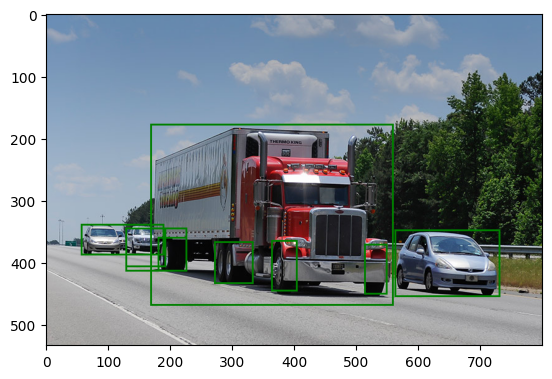

In [244]:

image=Image.open('images/pic1.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in new_bounding_box:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

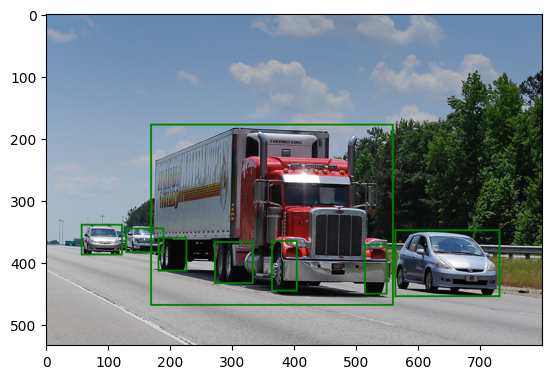

In [240]:

image=Image.open('images/pic1.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in new_bounding_box:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

In [178]:
regions=[]
for img in bb['images'][1]:
    for region in img['annotated_regions']:
        regions.append(region['regions'] )
bb=[]
for sub_regions in regions:
    bb.append(list(sub_regions.values()))

TypeError: string indices must be integers, not 'str'

In [180]:
bb_all_images={}
for img in bb['images']:
    image_path=img['location']
    boun_box=[]
    for regions in img['annotated_regions']:
        region_data=regions['region']
        x1, y1, x2, y2 = region_data['xmin'], region_data['ymin'], region_data['xmax'], region_data['ymax']
        boun_box.append((x1, y1, x2, y2))
    bb_all_images[image_path]=boun_box

print(bb_all_images.keys(), bb_all_images.values())


dict_keys(['images/pic1.jpg', 'images/pic3.jpg', 'images/pic4.jpg', 'images/pic5.jpg', 'images/pic2.jpg']) dict_values([[(0.6413427734375, 0.6965780079588015, 0.688720703125, 0.8477147705992509), (0.161240234375, 0.6462356624531835, 0.238310546875, 0.721361481741573), (0.3599468994140625, 0.6887298469686329, 0.4178986358642578, 0.815910196482912), (0.3394189453125, 0.6878072331460674, 0.3684814453125, 0.8056384597378277), (0.210302734375, 0.3345037453183521, 0.7, 0.8810495669475655), (0.4545947265625, 0.6849762991573034, 0.5063427734375, 0.8378686797752809), (0.702763671875, 0.6530386821161048, 0.915439453125, 0.8549274344569289), (0.0711767578125, 0.6359652972846442, 0.153955078125, 0.7299128043071161), (0.2260498046875, 0.6758178253745318, 0.24232421875, 0.7654494382022472), (0.2345361328125, 0.6822112008426966, 0.284169921875, 0.7772486540262172)], [(0.6227185837765957, 0.7310913618995634, 0.7094788896276596, 0.9294060453056768), (0.27237782579787234, 0.7125665256550219, 0.316152759

In [182]:
bb_all_images['images/pic3.jpg']

[(0.6227185837765957,
  0.7310913618995634,
  0.7094788896276596,
  0.9294060453056768),
 (0.27237782579787234,
  0.7125665256550219,
  0.3161527593085106,
  0.8331485398471615),
 (0.25641206781914894,
  0.7054704557860262,
  0.2755568484042553,
  0.8265897925764192),
 (0.24529587765957447,
  0.18934224890829696,
  0.896201795212766,
  0.9618842112445415),
 (0.36943151595744683,
  0.7122680131004366,
  0.4114195478723404,
  0.8661640283842795),
 (0.41147772606382976,
  0.7121741948689956,
  0.4586186835106383,
  0.8872048990174672)]

In [223]:



bb=bb_all_images['images/pic3.jpg']
new_bounding_box={}
merged_indice=set()
for i in range(len(bb)):
    (X1,Y1,X2,Y2)=bb[i]
    for j in range(len(bb)):
        (x1,y1,x2,y2)=bb[j]
        if ((X1-x1<0) or (X2-x2<0) or (Y1-y1<0) or (Y2-y2<0)) and ((abs(X1 - x2) < 0.05) or (abs(X2 - x1) < 0.05) or 
            (abs(Y1 - y2) < 0.05) or (abs(Y2 - y1) < 0.05)) and i!=j:
            new_x1=min(X1,x1)
            new_x2=max(X2,x2)
            new_y1=min(y1,Y1)
            new_y2=max(Y2,y2)
            if (new_x1-new_x2)*(new_y1-new_y2)<0.015:
                key = (new_x1, new_y1, new_x2, new_y2)  # Une clé unique pour éviter les doublons
                new_bounding_box[key] = [new_x1, new_y1, new_x2, new_y2]
                merged_indice.add(i)
                merged_indice.add(j)

        # else:
        #     key=(x1,y1,x2,y2)
        #     new_bounding_box[key]=[x1,y1,x2,y2]
for k in range(len(bb)):
    if k not in merged_indice:
        (x1,y1,x2,y2)=bb[k]
        key=(x1,y1,x2,y2)
        new_bounding_box[key]=[x1,y1,x2,y2]
list(new_bounding_box)
    

        

[(0.25641206781914894,
  0.7054704557860262,
  0.3161527593085106,
  0.8331485398471615),
 (0.6227185837765957,
  0.7310913618995634,
  0.7094788896276596,
  0.9294060453056768),
 (0.24529587765957447,
  0.18934224890829696,
  0.896201795212766,
  0.9618842112445415),
 (0.36943151595744683,
  0.7122680131004366,
  0.4114195478723404,
  0.8661640283842795),
 (0.41147772606382976,
  0.7121741948689956,
  0.4586186835106383,
  0.8872048990174672)]

# Avant après Résultats

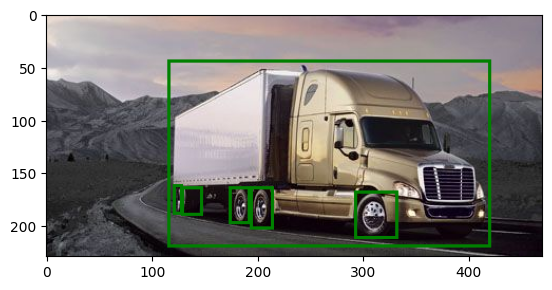

In [224]:
image=Image.open('images/pic3.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in bb_all_images['images/pic3.jpg']:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

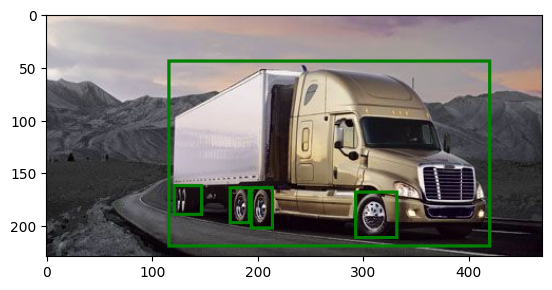

In [225]:
image=Image.open('images/pic3.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in new_bounding_box:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

In [232]:



bb=bb_all_images['images/pic4.jpg']
new_bounding_box={}
merged_indice=set()
for i in range(len(bb)):
    (X1,Y1,X2,Y2)=bb[i]
    for j in range(len(bb)):
        (x1,y1,x2,y2)=bb[j]
        if ((X1-x1<0) or (X2-x2<0) or (Y1-y1<0) or (Y2-y2<0)) and ((abs(X1 - x2) < 0.05) or (abs(X2 - x1) < 0.05) or 
            (abs(Y1 - y2) < 0.05) or (abs(Y2 - y1) < 0.05)) and i!=j:
            new_x1=min(X1,x1)
            new_x2=max(X2,x2)
            new_y1=min(y1,Y1)
            new_y2=max(Y2,y2)
            if (new_x1-new_x2)*(new_y1-new_y2)<0.019:
                key = (new_x1, new_y1, new_x2, new_y2)  # Une clé unique pour éviter les doublons
                new_bounding_box[key] = [new_x1, new_y1, new_x2, new_y2]
                merged_indice.add(i)
                merged_indice.add(j)

        # else:
        #     key=(x1,y1,x2,y2)
        #     new_bounding_box[key]=[x1,y1,x2,y2]
for k in range(len(bb)):
    if k not in merged_indice:
        (x1,y1,x2,y2)=bb[k]
        key=(x1,y1,x2,y2)
        new_bounding_box[key]=[x1,y1,x2,y2]
list(new_bounding_box)

[(0.04869791666666667, 0.623798828125, 0.15250651041666666, 0.79267578125),
 (0.8585221354166667, 0.64853515625, 0.93064453125, 0.7962890625),
 (0.4926171875, 0.68728515625, 0.56833984375, 0.85625),
 (0.46338541666666666, 0.298798828125, 0.9489908854166667, 0.8225),
 (0.66431640625, 0.6483203125, 0.7491796875, 0.838076171875),
 (0.0, 0.1882421875, 0.6409114583333333, 0.878271484375),
 (0.26173828125, 0.659189453125, 0.34693359375, 0.884873046875)]

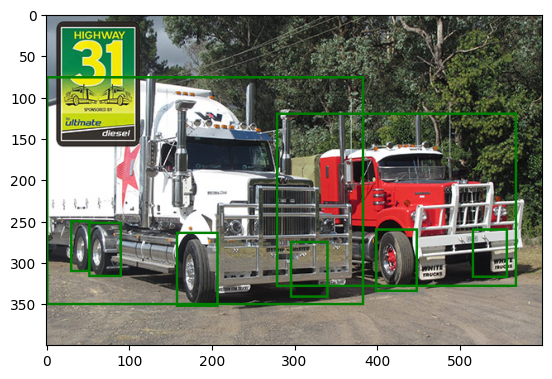

In [233]:
image=Image.open('images/pic4.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in bb_all_images['images/pic4.jpg']:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

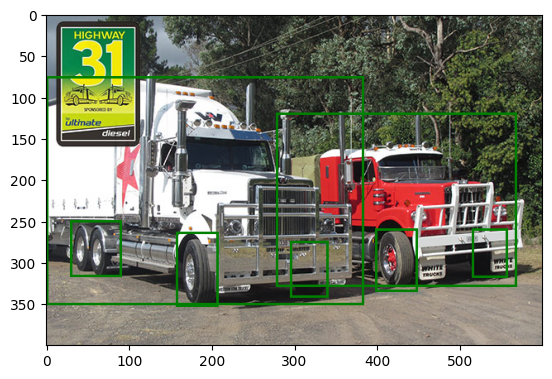

In [234]:
image=Image.open('images/pic4.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in new_bounding_box:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

In [245]:
bb=bb_all_images['images/pic2.jpg']
new_bounding_box={}
merged_indice=set()
for i in range(len(bb)):
    (X1,Y1,X2,Y2)=bb[i]
    for j in range(len(bb)):
        (x1,y1,x2,y2)=bb[j]
        if ((X1-x1<0) or (X2-x2<0) or (Y1-y1<0) or (Y2-y2<0)) and ((abs(X1 - x2) < 0.05) or (abs(X2 - x1) < 0.05) or 
            (abs(Y1 - y2) < 0.05) or (abs(Y2 - y1) < 0.05)) and i!=j:
            new_x1=min(X1,x1)
            new_x2=max(X2,x2)
            new_y1=min(y1,Y1)
            new_y2=max(Y2,y2)
            if (new_x1-new_x2)*(new_y1-new_y2)<0.019:
                key = (new_x1, new_y1, new_x2, new_y2)  # Une clé unique pour éviter les doublons
                new_bounding_box[key] = [new_x1, new_y1, new_x2, new_y2]
                merged_indice.add(i)
                merged_indice.add(j)

        # else:
        #     key=(x1,y1,x2,y2)
        #     new_bounding_box[key]=[x1,y1,x2,y2]
for k in range(len(bb)):
    if k not in merged_indice:
        (x1,y1,x2,y2)=bb[k]
        key=(x1,y1,x2,y2)
        new_bounding_box[key]=[x1,y1,x2,y2]
list(new_bounding_box)

[(0.749654296875, 0.6835611979166667, 0.7890703125, 0.7941189236111111),
 (0.5359375, 0.7250253182870371, 0.62039453125, 0.885474537037037),
 (0.1606328125, 0.25124421296296295, 0.815046875, 0.9287326388888889),
 (0.3705625, 0.7609664351851851, 0.428640625, 0.9526331018518519)]

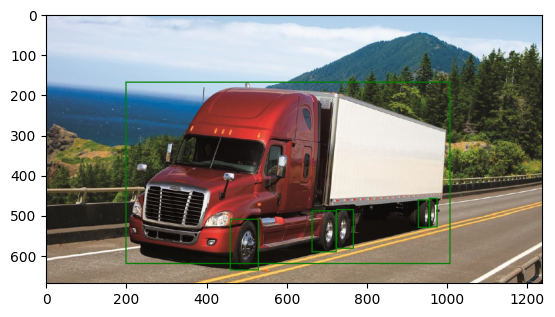

In [247]:
image=Image.open('images/pic2.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in bb_all_images['images/pic2.jpg']:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

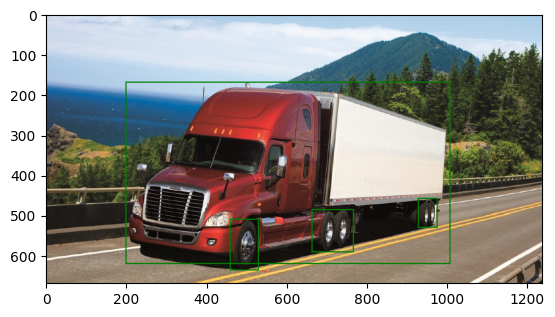

In [248]:
image=Image.open('images/pic2.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in new_bounding_box:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

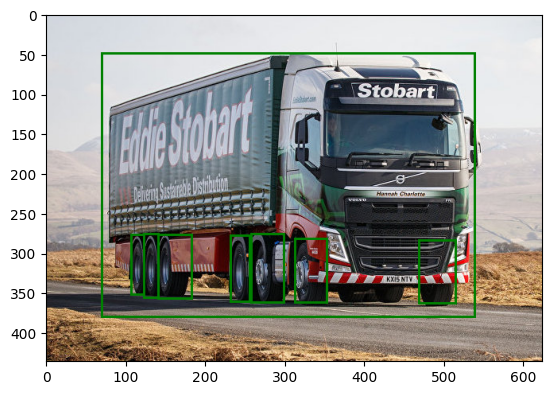

In [292]:
bb=bb_all_images['images/pic5.jpg']
new_bounding_box={}
merged_indice=set()
for i in range(len(bb)):
    (X1,Y1,X2,Y2)=bb[i]
    for j in range(len(bb)):
        (x1,y1,x2,y2)=bb[j]
        if ((X1-x1<0) or (X2-x2<0) or (Y1-y1<0) or (Y2-y2<0)) and ((abs(X1 - x2) < 0.01) or (abs(X2 - x1) < 0.01) or 
            (abs(Y1 - y2) < 0.01) or (abs(Y2 - y1) < 0.01)) and i!=j:
            new_x1=min(X1,x1)
            new_x2=max(X2,x2)
            new_y1=min(y1,Y1)
            new_y2=max(Y2,y2)
            if (new_x1-new_x2)*(new_y1-new_y2)<0.015:
                key = (new_x1, new_y1, new_x2, new_y2)  # Une clé unique pour éviter les doublons
                new_bounding_box[key] = [new_x1, new_y1, new_x2, new_y2]
                merged_indice.add(i)
                merged_indice.add(j)

        # else:
        #     key=(x1,y1,x2,y2)
        #     new_bounding_box[key]=[x1,y1,x2,y2]
for k in range(len(bb)):
    if k not in merged_indice:
        (x1,y1,x2,y2)=bb[k]
        key=(x1,y1,x2,y2)
        new_bounding_box[key]=[x1,y1,x2,y2]

image=Image.open('images/pic5.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in bb_all_images['images/pic5.jpg']:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

In [288]:
type(bb)

dict

In [293]:
bb=list(new_bounding_box)
new_bounding_box={}
merged_indice=set()
for i in range(len(bb)):
    (X1,Y1,X2,Y2)=bb[i]
    for j in range(len(bb)):
        (x1,y1,x2,y2)=bb[j]
        if ((X1-x1<0) or (X2-x2<0) or (Y1-y1<0) or (Y2-y2<0)) and ((abs(X1 - x2) < 0.01) or (abs(X2 - x1) < 0.01) or 
            (abs(Y1 - y2) < 0.01) or (abs(Y2 - y1) < 0.01)) and i!=j:
            new_x1=min(X1,x1)
            new_x2=max(X2,x2)
            new_y1=min(y1,Y1)
            new_y2=max(Y2,y2)
            if (new_x1-new_x2)*(new_y1-new_y2)<0.15:
                key = (new_x1, new_y1, new_x2, new_y2)  # Une clé unique pour éviter les doublons
                new_bounding_box[key] = [new_x1, new_y1, new_x2, new_y2]
                merged_indice.add(i)
                merged_indice.add(j)

        # else:
        #     key=(x1,y1,x2,y2)
        #     new_bounding_box[key]=[x1,y1,x2,y2]
for k in range(len(bb)):
    if k not in merged_indice:
        (x1,y1,x2,y2)=bb[k]
        key=(x1,y1,x2,y2)
        new_bounding_box[key]=[x1,y1,x2,y2]

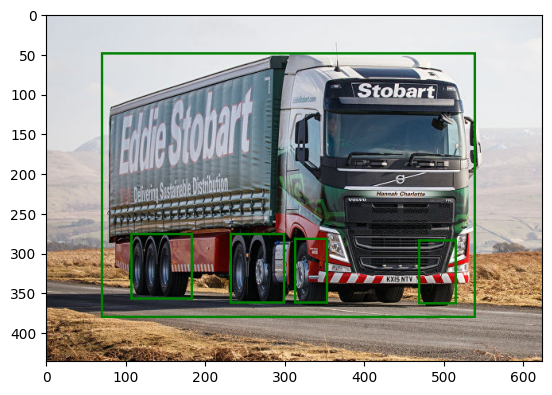

In [294]:
image=Image.open('images/pic5.jpg')
draw=ImageDraw.Draw(image)
for (x1,y1,x2,y2) in new_bounding_box:
    draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
plt.imshow(image)

In [391]:
#Commecons à coder la fonction
def merging_axes(bb, thresh1=0.01, thresh2=0.015):
    new_bounding_box={}
    merged_indice=set()
    for i in range(len(bb)):
        (X1,Y1,X2,Y2)=bb[i]
        for j in range(len(bb)):
            (x1,y1,x2,y2)=bb[j]
            if ((X1-x1<=0.01) or (X2-x2<=0.01) or (Y1-y1<=0.01) or (Y2-y2<=0.01)) and ((abs(X1 - x2) < thresh1) or (abs(X2 - x1) < thresh1) or 
                (abs(Y1 - y2) < thresh1) or (abs(Y2 - y1) < thresh1)) and i!=j:
                new_x1=min(X1,x1)
                new_x2=max(X2,x2)
                new_y1=min(y1,Y1)
                new_y2=max(Y2,y2)
                if (new_x1-new_x2)*(new_y1-new_y2)<thresh2:
                    key = (new_x1, new_y1, new_x2, new_y2)  
                    new_bounding_box[key] = [new_x1, new_y1, new_x2, new_y2]
                    merged_indice.add(i)
                    merged_indice.add(j)
    for k in range(len(bb)):
        if k not in merged_indice:
            (x1,y1,x2,y2)=bb[k]
            key=(x1,y1,x2,y2)
            new_bounding_box[key]=[x1,y1,x2,y2]
    return new_bounding_box

def verrifying_axes(bb, new_bounding_box):
    if len(new_bounding_box)>=(len(bb)-1):
        return False
    else:
        return True
def print_image(image_path, bb):
    new_bounding_box=merging_axes(bb)
    i=0
    while verrifying_axes(bb, new_bounding_box)==False and i<10:
        new_bounding_box=merging_axes(list(new_bounding_box), 0.05, 0.025 )
        i+=1
    image=Image.open(image_path)
    draw=ImageDraw.Draw(image)
    for (x1,y1,x2,y2) in new_bounding_box:
        draw.rectangle([int(x1*image.size[0]),int(y1*image.size[1]),int(x2*image.size[0]),int(y2*image.size[1])], outline="green", width=3)
    plt.imshow(image)

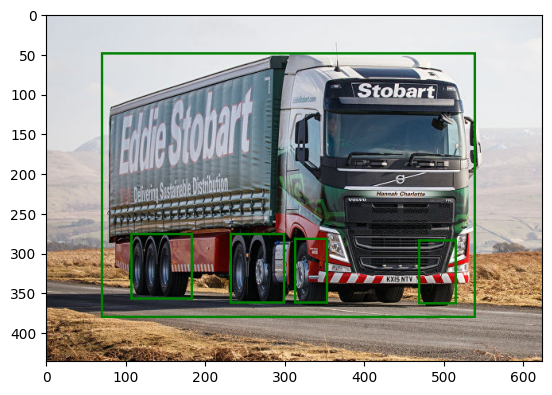

In [398]:
print_image('images/pic5.jpg',bb_all_images['images/pic5.jpg'] )